In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel('2-Span_Dataset_190914-1.xlsx', header = None, skiprows=2, nrows = 10002-2)
print(data.shape)

(10000, 26)


In [2]:
data= data.loc[data[0]==1]
data= data.loc[data[3]>=20]
data= data.loc[data[1]>=3]
data= data.loc[data[2]>=3]
print(data)

      0         1         2          3          4   5           6   \
12     1  8.036693  6.621703  59.930830  13.302514   0  -11.243810   
15     1  3.314051  6.650936  69.294040   5.946864   0   -6.415482   
16     1  4.474462  6.487012  72.919013  10.609219   0   -1.502025   
17     1  8.682127  3.167319  61.665732   5.483042   0   71.456656   
18     1  8.072093  8.133456  81.592774  14.610197   0  -20.260882   
...   ..       ...       ...        ...        ...  ..         ...   
9980   1  4.028240  6.093211  56.443040   9.243475   0   -2.346499   
9985   1  7.771782  3.427451  91.787825   3.258468   0  112.184813   
9995   1  3.970696  5.790132  61.591161   8.935587   0   -2.305294   
9996   1  5.529386  4.302831  52.422779   0.581853   0   12.450545   
9999   1  6.798161  9.714735  58.706105   8.886615   0  -23.122217   

              7           8           9   ...         16          17  \
12    -21.806177  -31.005658  -38.160810  ...  20.595110   43.215922   
15    -12.44214

In [3]:
N = data.shape[0]

X = np.zeros((N,21,1))
X2 = np.zeros((N,3,1))
Y = np.zeros((N,21))


for ii in range(0,N):
    a = data.iloc[ii,4]
    l1 = data.iloc[ii,1]
    l2 = data.iloc[ii,2]
    P = data.iloc[ii,3]
    
    if a<=l1:
        X[ii,int(np.round(a/(l1/10))),0] = 1
    if a>l1:
        X[ii,int(np.round(10+(a-l1)/(l2/10))),0] = 1
    
    X2[ii,0,0]=l1
    X2[ii,1,0]=l2
    X2[ii,2,0]=P
    #print(X[ii,:,0])
    Y[ii,:] = data.iloc[ii,5:26]


In [4]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(21,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(21, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(21, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(21, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer='adam')
history1 = model.fit( [X,X2[:,:,0]], Y, validation_data=([X,X2[:,:,0]], Y), epochs=500, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1




Tensor("dense_1/Relu:0", shape=(?, 21), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 3), dtype=float32)



Train on 1626 samples, validate on 1626 samples
Epoch 1/500
1626/1626 [==============================] - 1s 512us/step - loss: 8436.2826 - val_loss: 8170.9588
Epoch 2/500
1626/1626 [==============================] - 0s 135us/step - loss: 7764.4117 - val_loss: 6629.4510
Epoch 3/500
1626/1626 [==============================] - 0s 132us/step - loss: 4516.4451 - val_loss: 3271.5196
Epoch 4/500
1626/1626 [==============================] - 0s 138us/step - loss: 3050.7188 - val_loss: 2819.0909
Epoch 5/500
1626/1626 [==============================] - 0s 141us/step - loss: 2831.7252 - val_loss: 2698.0260
Epoch 6/500
1626/1626 [==============================] - 0s 140us/step - loss: 2730.9775 - val_loss: 2684.2137
Epoch 7/500
1626/1626 [==============================] - 0s 129us/step - loss: 2631.2241 - val_loss: 2620.4867
Epoch 8/500
1626/1626 [==============================] - 

1626/1626 [==============================] - 0s 130us/step - loss: 415.9507 - val_loss: 388.8777
Epoch 62/500
1626/1626 [==============================] - 0s 124us/step - loss: 400.9703 - val_loss: 375.2183
Epoch 63/500
1626/1626 [==============================] - 0s 127us/step - loss: 398.2265 - val_loss: 385.3442
Epoch 64/500
1626/1626 [==============================] - 0s 123us/step - loss: 580.1291 - val_loss: 326.4119
Epoch 65/500
1626/1626 [==============================] - 0s 124us/step - loss: 338.8548 - val_loss: 301.5038
Epoch 66/500
1626/1626 [==============================] - 0s 125us/step - loss: 310.1568 - val_loss: 352.9539
Epoch 67/500
1626/1626 [==============================] - 0s 130us/step - loss: 329.3655 - val_loss: 279.4260
Epoch 68/500
1626/1626 [==============================] - 0s 123us/step - loss: 271.6744 - val_loss: 240.8806
Epoch 69/500
1626/1626 [==============================] - 0s 126us/step - loss: 262.3694 - val_loss: 236.5193
Epoch 70/500
1626/1626 

1626/1626 [==============================] - 0s 127us/step - loss: 104.9981 - val_loss: 118.4553
Epoch 136/500
1626/1626 [==============================] - 0s 130us/step - loss: 95.3855 - val_loss: 104.4710
Epoch 137/500
1626/1626 [==============================] - 0s 123us/step - loss: 89.8531 - val_loss: 87.9750
Epoch 138/500
1626/1626 [==============================] - 0s 124us/step - loss: 114.9776 - val_loss: 79.0500
Epoch 139/500
1626/1626 [==============================] - 0s 125us/step - loss: 96.3168 - val_loss: 87.7398
Epoch 140/500
1626/1626 [==============================] - 0s 132us/step - loss: 94.9931 - val_loss: 84.4925
Epoch 141/500
1626/1626 [==============================] - 0s 133us/step - loss: 96.0770 - val_loss: 95.9147
Epoch 142/500
1626/1626 [==============================] - 0s 131us/step - loss: 98.4490 - val_loss: 142.6013
Epoch 143/500
1626/1626 [==============================] - 0s 132us/step - loss: 100.0101 - val_loss: 78.6701
Epoch 144/500
1626/1626 [==

Epoch 210/500
1626/1626 [==============================] - 0s 131us/step - loss: 84.1455 - val_loss: 126.2597
Epoch 211/500
1626/1626 [==============================] - 0s 125us/step - loss: 214.8393 - val_loss: 176.7583
Epoch 212/500
1626/1626 [==============================] - 0s 140us/step - loss: 99.0183 - val_loss: 67.2906
Epoch 213/500
1626/1626 [==============================] - 0s 142us/step - loss: 79.7981 - val_loss: 67.3669
Epoch 214/500
1626/1626 [==============================] - 0s 142us/step - loss: 72.7622 - val_loss: 69.4339
Epoch 215/500
1626/1626 [==============================] - 0s 147us/step - loss: 81.0788 - val_loss: 71.7155
Epoch 216/500
1626/1626 [==============================] - 0s 129us/step - loss: 109.3338 - val_loss: 120.1109
Epoch 217/500
1626/1626 [==============================] - 0s 128us/step - loss: 82.9070 - val_loss: 81.0468
Epoch 218/500
1626/1626 [==============================] - 0s 127us/step - loss: 71.3370 - val_loss: 63.7140
Epoch 219/500


1626/1626 [==============================] - 0s 130us/step - loss: 64.7906 - val_loss: 57.9530
Epoch 286/500
1626/1626 [==============================] - 0s 125us/step - loss: 64.1578 - val_loss: 58.3008
Epoch 287/500
1626/1626 [==============================] - 0s 124us/step - loss: 68.5218 - val_loss: 90.2313
Epoch 288/500
1626/1626 [==============================] - 0s 131us/step - loss: 89.8178 - val_loss: 74.6033
Epoch 289/500
1626/1626 [==============================] - 0s 127us/step - loss: 74.7248 - val_loss: 61.7531
Epoch 290/500
1626/1626 [==============================] - 0s 128us/step - loss: 66.5477 - val_loss: 51.6723
Epoch 291/500
1626/1626 [==============================] - 0s 127us/step - loss: 76.4697 - val_loss: 210.2371
Epoch 292/500
1626/1626 [==============================] - 0s 126us/step - loss: 97.5653 - val_loss: 56.6376
Epoch 293/500
1626/1626 [==============================] - 0s 127us/step - loss: 70.5837 - val_loss: 98.0878
Epoch 294/500
1626/1626 [=======

1626/1626 [==============================] - 0s 142us/step - loss: 59.0971 - val_loss: 50.5190
Epoch 361/500
1626/1626 [==============================] - 0s 130us/step - loss: 66.3827 - val_loss: 52.0090
Epoch 362/500
1626/1626 [==============================] - 0s 133us/step - loss: 58.7594 - val_loss: 50.8849
Epoch 363/500
1626/1626 [==============================] - 0s 137us/step - loss: 66.5335 - val_loss: 64.4207
Epoch 364/500
1626/1626 [==============================] - 0s 134us/step - loss: 89.2524 - val_loss: 88.4693
Epoch 365/500
1626/1626 [==============================] - 0s 135us/step - loss: 83.0426 - val_loss: 58.2980
Epoch 366/500
1626/1626 [==============================] - 0s 125us/step - loss: 68.8271 - val_loss: 69.2573
Epoch 367/500
1626/1626 [==============================] - 0s 128us/step - loss: 78.8542 - val_loss: 119.5541
Epoch 368/500
1626/1626 [==============================] - 0s 128us/step - loss: 80.0253 - val_loss: 63.0990
Epoch 369/500
1626/1626 [=======

1626/1626 [==============================] - 0s 128us/step - loss: 59.7904 - val_loss: 53.7675
Epoch 436/500
1626/1626 [==============================] - 0s 125us/step - loss: 59.0791 - val_loss: 67.1568
Epoch 437/500
1626/1626 [==============================] - 0s 125us/step - loss: 65.9406 - val_loss: 73.2192
Epoch 438/500
1626/1626 [==============================] - 0s 126us/step - loss: 67.8638 - val_loss: 56.7679
Epoch 439/500
1626/1626 [==============================] - 0s 142us/step - loss: 58.8248 - val_loss: 49.2077
Epoch 440/500
1626/1626 [==============================] - 0s 136us/step - loss: 91.3968 - val_loss: 70.2919
Epoch 441/500
1626/1626 [==============================] - 0s 129us/step - loss: 73.6873 - val_loss: 49.1287
Epoch 442/500
1626/1626 [==============================] - 0s 134us/step - loss: 59.3815 - val_loss: 120.7891
Epoch 443/500
1626/1626 [==============================] - 0s 126us/step - loss: 73.4077 - val_loss: 67.2513
Epoch 444/500
1626/1626 [=======

<Figure size 640x480 with 1 Axes>

In [5]:
N = data.shape[0]

SX = np.zeros((N,24,1))
Y = np.zeros((N,21))


for ii in range(0,N):
    a = data.iloc[ii,4]
    l1 = data.iloc[ii,1]
    l2 = data.iloc[ii,2]
    P = data.iloc[ii,3]
    
    if a<=l1:
        SX[ii,int(np.round(a/(l1/10))),0] = 1
    if a>l1:
        SX[ii,int(np.round(10+(a-l1)/(l2/10))),0] = 1
    
    SX[ii,-1,0]=l1
    SX[ii,-2,0]=l2
    SX[ii,-3,0]=P
    #print(X[ii,:,0])
    Y[ii,:] = data.iloc[ii,5:26]


In [7]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# ['linear','sigmoid','relu']:
model2 = Sequential()
#model.add(Dense(units=64, activation='sigmoid', kernel_regularizer=krs.regularizers.l2(0.001), use_bias=True, input_shape=(12,)))
model2.add(Dense(units=64, activation='relu', use_bias=True, input_shape=(24,)))
model2.add(Dense(units=32, activation='relu', use_bias=True))
model2.add(Dense(units=24, activation='relu', use_bias=True))
model2.add(Dense(units=21, activation='linear', use_bias=False))
model2.compile(loss='mean_squared_error', optimizer='adam')
history2 = model2.fit( SX[:,:,0], Y, validation_data=(SX[:,:,0], Y), epochs=30, batch_size=32, verbose=1)  

Train on 1626 samples, validate on 1626 samples
Epoch 1/30
1626/1626 [==============================] - 1s 368us/step - loss: 8360.2919 - val_loss: 7933.5288
Epoch 2/30
1626/1626 [==============================] - 0s 48us/step - loss: 7751.9792 - val_loss: 7650.4012
Epoch 3/30
1626/1626 [==============================] - 0s 50us/step - loss: 7643.3611 - val_loss: 7623.7301
Epoch 4/30
1626/1626 [==============================] - 0s 49us/step - loss: 7622.5224 - val_loss: 7603.7530
Epoch 5/30
1626/1626 [==============================] - 0s 48us/step - loss: 7600.1516 - val_loss: 7576.9648
Epoch 6/30
1626/1626 [==============================] - 0s 48us/step - loss: 7567.0267 - val_loss: 7542.6264
Epoch 7/30
1626/1626 [==============================] - 0s 48us/step - loss: 7497.1717 - val_loss: 7430.0574
Epoch 8/30
1626/1626 [==============================] - 0s 48us/step - loss: 7320.2524 - val_loss: 7170.2755
Epoch 9/30
1626/1626 [==============================] - 0s 47us/step - loss: 69

[ 0.00000000e+00 -1.12438101e+01 -2.18061772e+01 -3.10056582e+01
 -3.81608100e+01 -4.25901898e+01 -4.36123543e+01 -4.05458607e+01
 -3.27092657e+01 -1.94211265e+01 -2.28416566e-14  2.05951100e+01
  4.32159225e+01  6.52620499e+01  8.41331045e+01  9.72286987e+01
  1.01948445e+02  9.56919553e+01  7.58590305e+01  4.18494424e+01
  2.43428380e-13]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


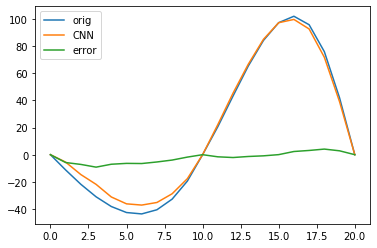

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


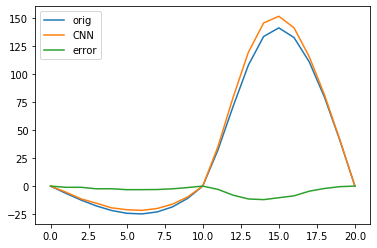

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


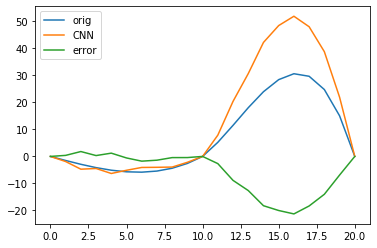

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


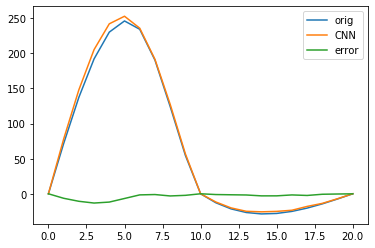

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


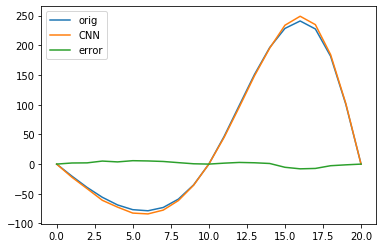

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


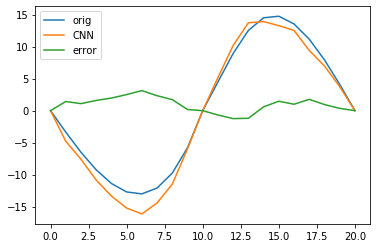

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


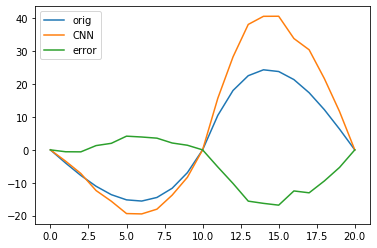

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


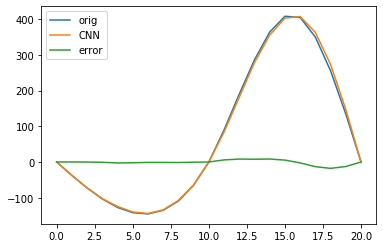

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


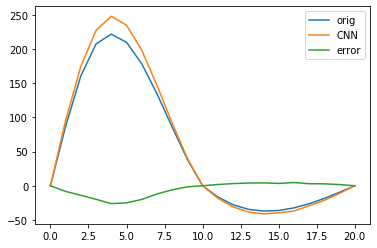

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


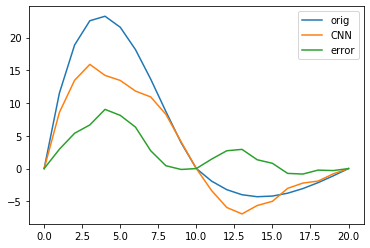

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


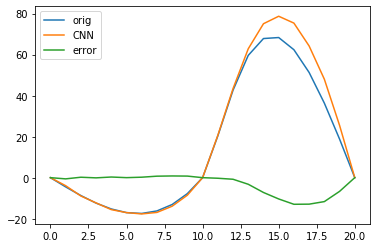

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


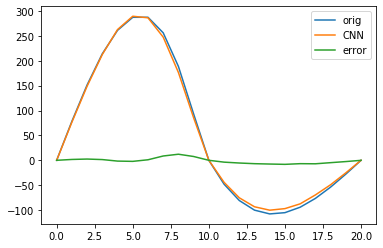

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


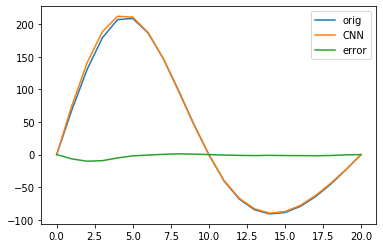

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


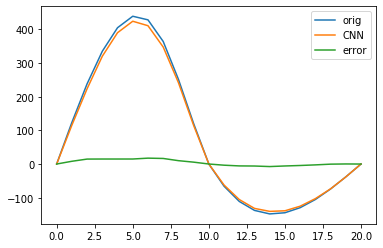

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


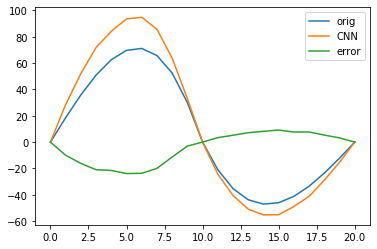

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


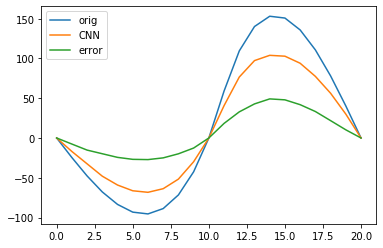

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


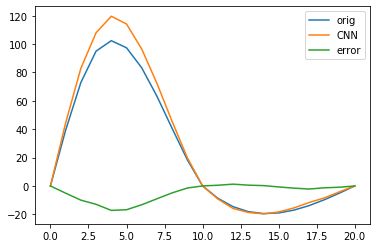

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


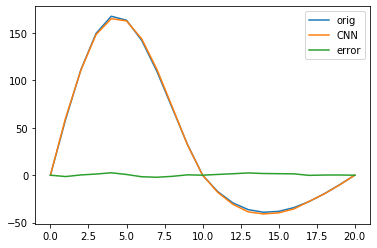

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


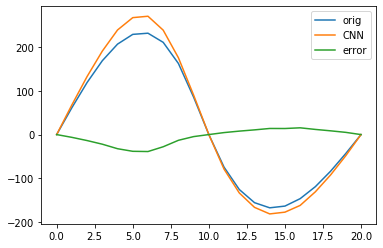

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


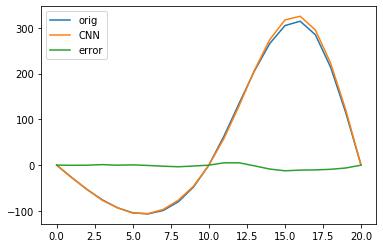

In [9]:
y_pred1 = model.predict([X,X2[:,:,0]])
y_pred2 = model2.predict([SX[:,:,0]])
import time
print(Y[0,:])

fig = plt.figure()
for ii in range(20):
    print(X[ii,:,0])
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='CNN')
    plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    #plt.plot(y_pred2[ii,:],label='MLP')
    
    plt.legend()
    plt.show()
    time.sleep(2) 
    plt.close()

In [ ]:
err1 = np.sum(np.abs(y_pred1-Y)/N,axis=0)

print("errors1\n ", err1)

plt.plot(err1,label='error')
plt.legend()
plt.show()
time.sleep(2) 
plt.close()
    